<a href="https://colab.research.google.com/github/hoangnuthuphuong/MACHINE-LEARNING-TEST/blob/main/final_test1/preprocessing_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://viblo.asia/p/top-machine-learning-algorithms-DbmemLZwGAg

https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import itertools
import pandas as pd
from matplotlib import pyplot as plt
from skimage import io
from skimage.transform import resize
from PIL import Image
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, hamming_loss, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import LabelBinarizer, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Hàm kiểm tra ảnh có lỗi hay không
def check_corrupted_image(img_file):
    try:
        with Image.open(img_file) as img:
            img.verify()
            img_new = io.imread(os.path.join(img_file))
        return False
    except Exception as e:
        print(e)
        return True

In [ ]:
# Hàm chuyển ảnh màu thành vector 1024
# Đọc ảnh -> xám, resize ,làm phẳng
def read_img_data(path,label, size):
    labels = []
    img_data = []
    # xác định đường dẫn và biến dữ  ảnh
    files = os.listdir(path)
    # đọc tất cả file trong path
    for img_file in files:
        if not(check_corrupted_image(os.path.join(path,img_file))):
            img = io.imread(os.path.join(path, img_file), as_gray=True) # chuyển ảnh sang ảnh xámxám
            img = resize(img, size) # resize để đưa tất cả các ảnh về chung một kích thước
            img_vector = img.flatten() # Làm phẳng ảnh
            labels.append(labels)
            img_data.append(img_vector)
    labels = np.array(labels)
    return labels, img_data

cannot identify image file '/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở/final_test1/PetImages/Cat/Thumbs.db'
cannot identify image file '/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở/final_test1/PetImages/Cat/666.jpg'
'NoneType' object has no attribute 'ReadAsArray'
cannot identify image file '/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở/final_test1/PetImages/Dog/Thumbs.db'


/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 283
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWar

cannot identify image file '/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở/final_test1/PetImages/Dog/11702.jpg'
Confusion matrix, without normalization
[[2030 1641]
 [1269 2560]]


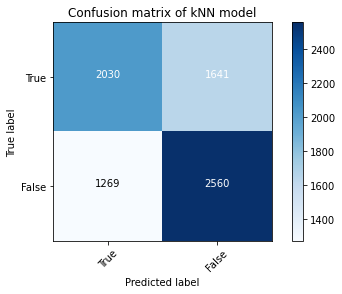

Confusion matrix, without normalization
[[2229 1442]
 [1749 2080]]


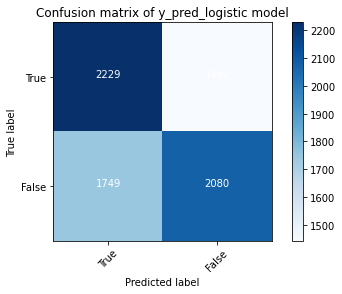


ĐÁNH GIÁ MÔ HÌNH K-NN
accuracy score:  0.612
Balandced accuracy score:  0.610782356813431
Haming loss:  0.388

ĐÁNH GIÁ MÔ HÌNH LOGISTIC RREGRESSION
accuracy score:  0.5745333333333333
Balandced accuracy score:  0.5752071372617706
Haming loss:  0.42546666666666666
Logistic Regression
----------------------------------
Accuracy: 0.5745333333333333
Classification report:
              precision    recall  f1-score   support

           0       0.56      0.61      0.58      3671
           1       0.59      0.54      0.57      3829

    accuracy                           0.57      7500
   macro avg       0.58      0.58      0.57      7500
weighted avg       0.58      0.57      0.57      7500


	Bảng so sánh
      Scores       kNN  Logistic regression
0   accuracy  0.612000             0.574533
1  precision  0.609379             0.590574
2     recall  0.668582             0.543223
3         f1  0.637609             0.565909

	precision_recall_curve mô hình kNN


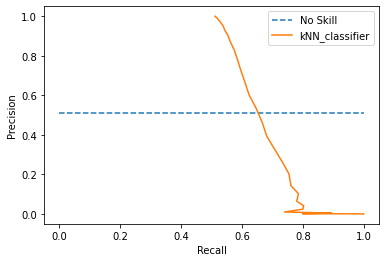


	precision_recall_curve mô hình logistic


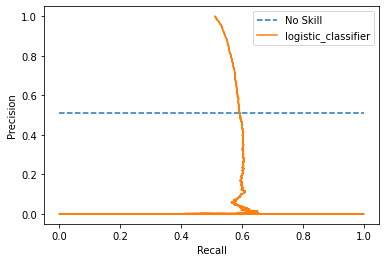


	ROC mô hình kNN


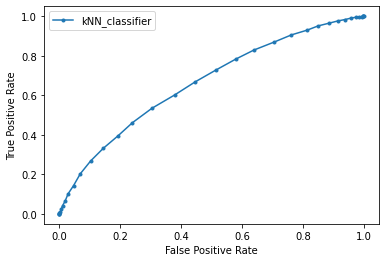


	ROC mô hình logistic_classifier


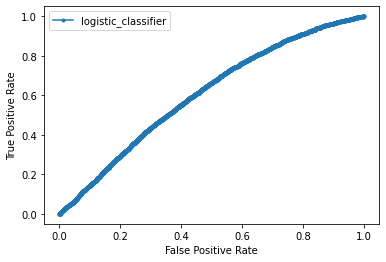

In [3]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from skimage import io
from skimage.transform import resize
import os
# Tiền xử lý dữ liệu
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
# Huấn luyện mô hình
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
# Đánh giá mô hình
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

PATH = "/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở/final_test1/PetImages"

#HÀM KIỂM TRA ẢNH CÓ LỖI HAY KHÔNG
def check_corrupted_image(file):
    try:
        with Image.open(file) as img:
            img.verify()
            img_new = io.imread(os.path.join(file))
        return False
    except Exception as e:
        print(e)
        return True

def read_img_data(path, size):
    X = []
    y = []
    label = path.split ("\\")[-1]
    files = os.listdir(path)
    for img_file in files:
        if not check_corrupted_image(os.path.join(path,img_file)):
            img = io.imread(os.path.join(path, img_file), as_gray=True)
            img = resize(img, size)
            img_flatten = list(img.flatten())
            X.append(img_flatten)
            y.append(label)
    return X,y

def read_img_datasets(folder_path, size):
    X = []
    y = []
    for img_folder in os.listdir(folder_path):
        X_temp, y_temp = read_img_data(os.path.join(folder_path, img_folder), size)
        X.extend(X_temp)
        y.extend(y_temp)
    return np.array(X), np.array(y)

# mã hóa nhãn lớp
def encode_label(y):
    lb = LabelBinarizer()
    return lb.fit_transform(y).reshape(y.shape[0], )

def count_unique_labels(y):
    unique, counts = np.unique(y, return_counts = True)
    result = dict(zip(unique, counts))
    return result

#hàm chuyển ảnh màn hình thành vector 1024
def convert_D_2_vector(path,label,size):
    labels = []
    img_data = []
    images = os.listdir(path)
    for img_file in images:
        if not(check_corrupted_image(os.path.join(path,img_file))):
            img_grey = io.imread(os.path.join(path,img_file), as_grey = True)
            img_vector = resize(img_grey,size).flatten()
            img_data.append(img_vector)
            labels.append(label)
    return img_data, labels

#Hàm huấn luyện mô hình
def kNN_grid_search_cv(X_train, y_train):
    from math import sqrt
    m = y_train.shape[0]
    k_max = int(sqrt(m)/2)
    k_values = np.arange(start = 1, stop = k_max + 1, dtype = int)
    params = { 'n_neighbors': k_values}
    kNN = KNeighborsClassifier()
    kNN_grid = GridSearchCV(kNN, params, cv=3)
    kNN_grid.fit(X_train, y_train)
    return kNN_grid

def logistic_regression_cv(X_train, y_train):
    logistic_classifier = LogisticRegressionCV(cv=5, solver="sag", max_iter=2000)
    logistic_classifier.fit(X_train, y_train)
    return logistic_classifier






#Hàm đánh giá mô hình
def evaluate_model(y_test, y_pred):
    print("accuracy score: ", accuracy_score(y_test, y_pred))
    print("Balandced accuracy score: ", balanced_accuracy_score(y_test, y_pred))
    print("Haming loss: ", hamming_loss(y_test, y_pred))

def evaluate_report(name, y_test, y_pred):
    print(name)    
    print("----------------------------------")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification report:")
    print(classification_report(y_test, y_pred))



import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
     


# vì ta đã xác định được từ đầu là bài toán phân lớp nhị phân nên ta dùng thang đo "binary"
def test_score(y_test, y_pred, class_type = "binary"):
    if class_type == "binary":
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        result = [accuracy, precision, recall, f1]
    return result

def test_table(knn_score, lg_score):
    result = {"Scores": ["accuracy", "precision", "recall", "f1"],
              "kNN": knn_score,"Logistic regression":lg_score}
    return pd.DataFrame(result)


def draw_precision_recall_curve(X_test, y_test, modal, name):
    no_modal = len(y_test [y_test == 1])/len(y_test)
    plt.plot([0,1], [no_modal, no_modal], linestyle = '--', label = 'No Skill')
    probs = modal.predict_proba(X_test) [:, 1]
    pre, rec, _ = precision_recall_curve(y_test, probs)
    plt.plot(pre, rec, label=name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

def draw_ROC(X_test, y_test, modal, name):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    probs = modal.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, probs)
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    fpr, tpr, _ = roc_curve(y_test, probs)
    #plt.plot(ns_probs, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label=name)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

def save_data(name,data):
    pickle_out = open(f"{name}.pickle", "wb")
    pickle.dump(data, pickle_out)
    pickle_out.close()
def import_data(name):
    pickle_in = open(f"{name}.pickle", "rb")
    X = pickle.load(pickle_in)


def main():
    # đọc dữ liệu ảnh, nhãn từ các folder
    X, y = read_img_datasets(PATH, size = (32,32))
    save_data("X",X)
    save_data("y",y)


    # mã hoá nhãn lớp
    y = encode_label(y)    

    # phân chia tập train và test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state = 15)

    #huấn luyện mô hình
    kNN_classifier = kNN_grid_search_cv(X_train, y_train)
    logistic_classifier = logistic_regression_cv(X_train, y_train)
    save_data("kNN_classifier",kNN_classifier)
    save_data("logistic_classifier",logistic_classifier)

    # dự đoán kết quả
    y_pred_kNN = kNN_classifier.predict(X_test)
    y_pred_logistic = logistic_classifier.predict(X_test)

    # Ma trận hỗn hợp
    confusion = confusion_matrix(y_test, y_pred_kNN)
    plot_confusion_matrix(confusion, classes=['True', 'False'],
                          title='Confusion matrix of kNN model')
    confusion = confusion_matrix(y_test, y_pred_logistic)
    plot_confusion_matrix(confusion, classes=['True', 'False'],
                          title='Confusion matrix of y_pred_logistic model')

    # đánh giá mô hình
    print("\nĐÁNH GIÁ MÔ HÌNH K-NN")
    evaluate_model(y_test, y_pred_kNN)
    print("\nĐÁNH GIÁ MÔ HÌNH LOGISTIC RREGRESSION")
    evaluate_model(y_test, y_pred_logistic)

    # report
    evaluate_report("Logistic Regression",y_test, y_pred_logistic)

    #plot_confusion_matrix(y_test,y_pred_logistic)
    knn_score = test_score(y_test, y_pred_kNN)
    lg_score = test_score(y_test, y_pred_logistic)

    print("\n\tBảng so sánh")
    print(test_table(knn_score,lg_score))

    print("\n\tprecision_recall_curve mô hình kNN")
    draw_precision_recall_curve(X_test, y_test,kNN_classifier, "kNN_classifier")
    print("\n\tprecision_recall_curve mô hình logistic")
    draw_precision_recall_curve(X_test, y_test,logistic_classifier, "logistic_classifier")

    print("\n\tROC mô hình kNN")
    draw_ROC(X_test, y_test,kNN_classifier, "kNN_classifier")
    print("\n\tROC mô hình logistic_classifier")
    draw_ROC(X_test, y_test, logistic_classifier, "logistic_classifier")



if __name__ == '__main__':
    main()